---

### Pasos del Taller SVM

1. **Cargar y explorar el dataset**
2. **Preprocesamiento de datos **
3. **Separar datos en train/test**
4. **Entrenar SVM:**
   - Kernel lineal y no lineal (RBF)
   - Estrategia 1 vs 1
   - Estrategia 1 vs all
   - Hiperparámetros ajustados con GridSearchCV
5. **Entrenar otros clasificadores para comparar:**
   - RandomForest
   - KNN
   - Logistic Regression
6. **Comparar los resultados**
   - Métricas de precisión, recall, f1-score
   - Interpretabilidad y facilidad de ajuste
7. **Conclusiones sobre desempeño y facilidad de uso**


### base de datos svm_30k_22_16

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
# Cargar el dataset
df = pd.read_csv('svm_30k_22_16.csv')

# Ver primeras filas
print(df.head())

# Verificar columnas
print(df.columns)


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  59.721593  -8.546082 -37.579689   9.832797  -2.955614  -5.411926   
1 -14.122886  -5.746620   0.287884 -28.027219   2.693045  31.368962   
2  15.627773   0.554732  -9.047167  33.049798 -12.960678  17.276247   
3  36.516697  17.441581   8.760227  24.782512  -5.105414  23.917498   
4  16.391862  14.230715 -19.211319   5.442162 -19.561958   1.799838   

   feature_6  feature_7  feature_8  feature_9  ...  feature_13  feature_14  \
0 -16.056478   4.164852   0.246286   7.974346  ...   -1.627881   22.217173   
1   6.612644 -13.773901  42.100477  -8.424769  ...  -34.373195  -12.734656   
2  -6.806244  -5.170336  -7.552115 -17.114208  ...   40.658123   -5.952550   
3 -36.651078   2.755014  -6.659416  15.507527  ...   22.801415  -11.418174   
4  -7.462112 -10.104525  11.813353  16.377996  ...  -16.528098  -18.939394   

   feature_15  feature_16  feature_17  feature_18  feature_19  feature_20  \
0    8.737635  -11.586046  

In [4]:
# Separar características y variable objetivo
X = df.drop('target', axis=1)
y = df['target']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [5]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}


In [6]:
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModelo: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred)


In [7]:
svc = SVC()
ovo = OneVsOneClassifier(GridSearchCV(svc, param_grid, cv=3, n_jobs=-1))
accuracy_ovo = train_and_evaluate(ovo, "SVM One-vs-One")



Modelo: SVM One-vs-One
Accuracy: 0.5996666666666667
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59      1125
           1       0.64      0.66      0.65      1125
           2       0.56      0.55      0.55      1125
           3       0.64      0.68      0.66      1125
           4       0.61      0.59      0.60      1125
           5       0.61      0.64      0.62      1125
           6       0.61      0.58      0.60      1125
           7       0.52      0.49      0.51      1125

    accuracy                           0.60      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.60      0.60      0.60      9000



In [8]:
ovr = OneVsRestClassifier(GridSearchCV(svc, param_grid, cv=3, n_jobs=-1))
accuracy_ovr = train_and_evaluate(ovr, "SVM One-vs-Rest")



Modelo: SVM One-vs-Rest
Accuracy: 0.5862222222222222
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58      1125
           1       0.61      0.67      0.64      1125
           2       0.55      0.51      0.53      1125
           3       0.61      0.68      0.64      1125
           4       0.60      0.59      0.59      1125
           5       0.58      0.64      0.61      1125
           6       0.60      0.58      0.59      1125
           7       0.56      0.44      0.49      1125

    accuracy                           0.59      9000
   macro avg       0.58      0.59      0.58      9000
weighted avg       0.58      0.59      0.58      9000



In [9]:
knn = KNeighborsClassifier()
accuracy_knn = train_and_evaluate(knn, "K-Nearest Neighbors")



Modelo: K-Nearest Neighbors
Accuracy: 0.44455555555555554
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.36      0.52      0.43      1125
           1       0.46      0.56      0.51      1125
           2       0.38      0.42      0.40      1125
           3       0.52      0.51      0.52      1125
           4       0.49      0.44      0.46      1125
           5       0.50      0.44      0.47      1125
           6       0.49      0.38      0.43      1125
           7       0.40      0.29      0.33      1125

    accuracy                           0.44      9000
   macro avg       0.45      0.44      0.44      9000
weighted avg       0.45      0.44      0.44      9000



C:\Users\Rog Strix\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Rog Strix\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Rog Strix\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rog Strix\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Rog Strix\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid

In [10]:
rf = RandomForestClassifier(random_state=42)
accuracy_rf = train_and_evaluate(rf, "Random Forest")




Modelo: Random Forest
Accuracy: 0.5487777777777778
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54      1125
           1       0.58      0.60      0.59      1125
           2       0.50      0.51      0.50      1125
           3       0.59      0.64      0.62      1125
           4       0.55      0.54      0.55      1125
           5       0.56      0.60      0.58      1125
           6       0.57      0.54      0.55      1125
           7       0.48      0.41      0.44      1125

    accuracy                           0.55      9000
   macro avg       0.55      0.55      0.55      9000
weighted avg       0.55      0.55      0.55      9000



In [20]:
log_reg = LogisticRegression(max_iter=1000)
accuracy_log_reg = train_and_evaluate(log_reg, "Logistic Regression")



Modelo: Logistic Regression
Accuracy: 0.5973333333333334
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59      1125
           1       0.63      0.65      0.64      1125
           2       0.55      0.55      0.55      1125
           3       0.63      0.68      0.66      1125
           4       0.61      0.58      0.60      1125
           5       0.60      0.64      0.62      1125
           6       0.62      0.59      0.60      1125
           7       0.53      0.50      0.51      1125

    accuracy                           0.60      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.60      0.60      0.60      9000



In [22]:
results = {
    'SVM One-vs-One': accuracy_ovo,
    'SVM One-vs-Rest': accuracy_ovr,
    'Random Forest': accuracy_rf,
    'K-Nearest Neighbors': accuracy_knn,
    'Logistic Regression': accuracy_log_reg
}

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


SVM One-vs-One: 0.5997
SVM One-vs-Rest: 0.5862
Random Forest: 0.5488
K-Nearest Neighbors: 0.4446
Logistic Regression: 0.5973


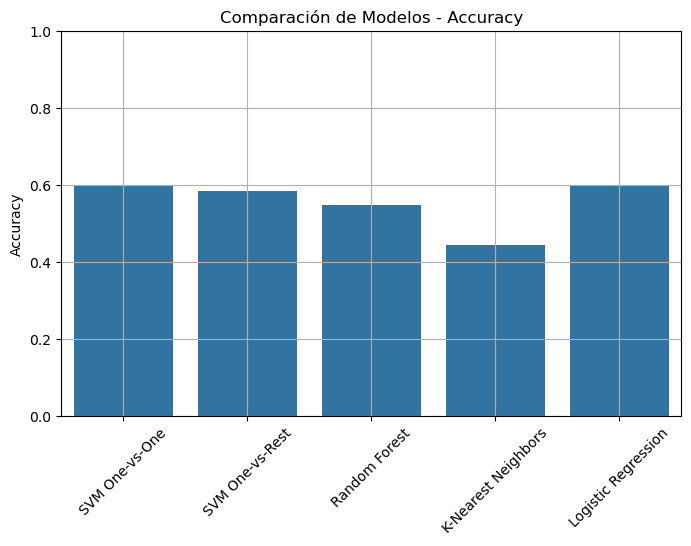

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Comparación de Modelos - Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


---

### 📌 Resultados de Accuracy final:

| Modelo                | Accuracy |
|-----------------------|----------|
| SVM One-vs-One        | 0.5997   |
| Logistic Regression   | 0.5973   |
| SVM One-vs-Rest       | 0.5862   |
| Random Forest         | 0.5488   |
| K-Nearest Neighbors   | 0.4446   |

---

###  Conclusión Dataset `svm_30k_22_16.csv`

> En este taller se entrenaron varios clasificadores para un problema multiclase , haciendo uso  de Support Vector Machines (SVM) con diferentes configuraciones. El mejor rendimiento se obtuvo con **SVM One-vs-One**, alcanzando una precisión de **59.97%**, ligeramente superior a la **regresión logística** (59.73%).  

> La forma **One-vs-One** permitió una mejor separación de clases al entrenar clasificadores binarios para cada par de clases, lo que resultó más efectivo que la estrategia **One-vs-Rest**.  

> Aunque **Random Forest** presentó una precisión bastante regular de (54.88%), fue menos competitivo. **K-Nearest Neighbors** tuvo el peor rendimiento (44.46%), puede ser por la alta dimensionalidad del dataset o tambien por la forma de los datos a la hora de hacer el analisis exploratorio.

> En cuanto a la **interpretabilidad**, la regresión logística y Random Forest fueron más fáciles de ajustar y comprender, ya que permiten visualizar coeficientes e importancia de variables, respectivamente. SVM, aunque más precisa, requiere más tiempo de ajuste por sus hiperparámetros (C, gamma y kernel) por lo que se demoro mas tiempo en ejecutar.

> **SVM con One-vs-One y kernel optimizado vía GridSearchCV** fue el modelo más efectivo en términos de precisión, pero modelos como **Logistic Regression** ofrecen un mejor balance entre rendimiento e interpretabilidad.

---


### base de datos svm_30k_10_18

In [8]:
import pandas as pd

# Cargar el nuevo archivo
df2 = pd.read_csv('svm_30k_10_18.csv')

# Mostrar las primeras filas para exploración
df2.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,target
0,-7.081973,27.469610,8.408588,-3.903137,-16.915459,12.138900,24.182098,32.773110,5.731590,-28.633820,...,-14.281487,-11.146916,26.907373,-5.581156,31.467869,-6.633951,-12.029262,-0.414144,11.055131,1
1,3.212275,-19.942088,12.437222,3.558125,-1.317987,23.017136,-5.808664,20.167967,-20.547815,-7.154870,...,-4.483092,-10.360177,-7.554518,47.611048,15.509121,-12.165615,5.585796,-16.636277,22.721361,3
2,24.227238,3.481814,1.688387,-16.679565,-2.270555,-46.818954,-5.857571,-4.764626,39.817464,-4.731248,...,-29.368200,-2.881378,-17.247465,-6.245573,4.437225,31.306585,-25.511642,-11.043622,-7.367751,2
3,-36.912649,-13.141313,-22.174065,26.661577,-17.855902,-6.034255,-7.603735,-1.595438,4.569959,-34.578242,...,16.903889,18.458153,-10.804608,-14.705578,3.744321,-3.929030,-12.655299,16.619604,7.999459,1
4,-14.018433,10.039035,-4.995539,-0.948714,6.164530,2.058528,3.523541,35.764779,-19.657000,-47.615775,...,19.165798,-1.508866,-15.821329,-17.402111,6.074115,22.999435,15.098744,8.230881,-10.222919,5


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características y target
X2 = df2.drop('target', axis=1)
y2 = df2['target']

# Escalado
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# División en train/test
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_scaled, y2, test_size=0.3, random_state=42, stratify=y2
)


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

def train_and_evaluate(model, model_name):
    model.fit(X2_train, y2_train)
    y2_pred = model.predict(X2_test)
    print(f"\nModelo: {model_name}")
    print("Accuracy:", accuracy_score(y2_test, y2_pred))
    print("Reporte de clasificación:\n", classification_report(y2_test, y2_pred))
    return accuracy_score(y2_test, y2_pred)


In [14]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# SVM One-vs-One
svc2 = SVC()
ovo2 = OneVsOneClassifier(GridSearchCV(svc2, param_grid, cv=3, n_jobs=-1))
accuracy_ovo2 = train_and_evaluate(ovo2, "SVM One-vs-One")

# SVM One-vs-Rest
ovr2 = OneVsRestClassifier(GridSearchCV(svc2, param_grid, cv=3, n_jobs=-1))
accuracy_ovr2 = train_and_evaluate(ovr2, "SVM One-vs-Rest")



Modelo: SVM One-vs-One
Accuracy: 0.7147777777777777
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64      1125
           1       0.79      0.79      0.79      1125
           2       0.66      0.64      0.65      1125
           3       0.74      0.76      0.75      1125
           4       0.76      0.76      0.76      1125
           5       0.73      0.75      0.74      1125
           6       0.70      0.70      0.70      1125
           7       0.70      0.68      0.69      1125

    accuracy                           0.71      9000
   macro avg       0.71      0.71      0.71      9000
weighted avg       0.71      0.71      0.71      9000


Modelo: SVM One-vs-Rest
Accuracy: 0.7115555555555556
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63      1125
           1       0.76      0.80      0.78      1125
           2       0.68  

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier()
accuracy_knn2 = train_and_evaluate(knn2, "K-Nearest Neighbors")



Modelo: K-Nearest Neighbors
Accuracy: 0.5341111111111111
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.39      0.59      0.47      1125
           1       0.59      0.65      0.62      1125
           2       0.45      0.47      0.46      1125
           3       0.62      0.58      0.60      1125
           4       0.60      0.57      0.58      1125
           5       0.60      0.52      0.56      1125
           6       0.56      0.45      0.50      1125
           7       0.57      0.45      0.50      1125

    accuracy                           0.53      9000
   macro avg       0.55      0.53      0.54      9000
weighted avg       0.55      0.53      0.54      9000



C:\Users\Rog Strix\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Rog Strix\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Rog Strix\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rog Strix\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Rog Strix\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(random_state=42)
accuracy_rf2 = train_and_evaluate(rf2, "Random Forest")




Modelo: Random Forest
Accuracy: 0.6293333333333333
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55      1125
           1       0.66      0.71      0.68      1125
           2       0.54      0.55      0.54      1125
           3       0.69      0.69      0.69      1125
           4       0.66      0.69      0.67      1125
           5       0.67      0.64      0.66      1125
           6       0.64      0.59      0.61      1125
           7       0.64      0.60      0.62      1125

    accuracy                           0.63      9000
   macro avg       0.63      0.63      0.63      9000
weighted avg       0.63      0.63      0.63      9000



In [22]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(max_iter=1000)
accuracy_log_reg2 = train_and_evaluate(log_reg2, "Logistic Regression")



Modelo: Logistic Regression
Accuracy: 0.7184444444444444
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      1125
           1       0.78      0.80      0.79      1125
           2       0.67      0.64      0.65      1125
           3       0.75      0.77      0.76      1125
           4       0.75      0.77      0.76      1125
           5       0.74      0.74      0.74      1125
           6       0.71      0.71      0.71      1125
           7       0.71      0.69      0.70      1125

    accuracy                           0.72      9000
   macro avg       0.72      0.72      0.72      9000
weighted avg       0.72      0.72      0.72      9000



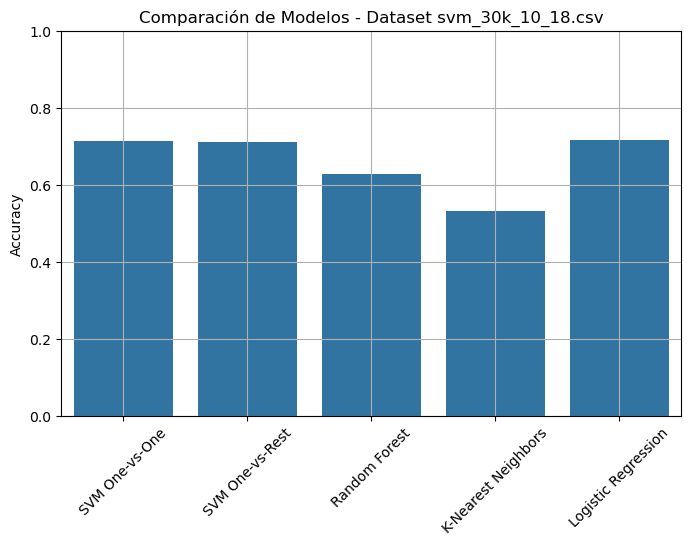

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resultados exactos
results2 = {
    'SVM One-vs-One': 0.7148,
    'SVM One-vs-Rest': 0.7116,
    'Random Forest': 0.6293,
    'K-Nearest Neighbors': 0.5341,
    'Logistic Regression': 0.7184
}

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results2.keys()), y=list(results2.values()))
plt.title('Comparación de Modelos - Dataset svm_30k_10_18.csv')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


---
###  Conclusión – Dataset `svm_30k_10_18.csv`

> El modelo con mayor precisión fue **Logistic Regression**, alcanzando un **accuracy del 71.84%**, superando ligeramente al **SVM One-vs-One** (71.48%) y al **SVM One-vs-Rest** (71.16%). pueda que los datos tengan una estructura lo suficientemente lineal como para que modelos como regresión logística funcionen muy bien, sin necesidad de kernels complejos.

> **Random Forest** obtuvo una precisión aceptable (62.93%), mientras que **K-Nearest Neighbors** fue el de menor rendimiento (53.41%), posiblemente afectado por la alta dimensionalidad del espacio de características y la sensibilidad del algoritmo a la escala y dispersión de los datos.

> En términos de facilidad de ajuste e interpretabilidad, **Logistic Regression** se destacó como el modelo más claro y accesible. En contraste, aunque **SVM** requiere un mayor esfuerzo en la selección de hiperparámetros (`C`, `gamma`, y tipo de `kernel`), sigue siendo una opción potente y robusta.

> En resumen, este conjunto de datos mostró ser especialmente favorable para modelos lineales, lo que se reflejó en el excelente desempeño de la regresión logística. SVM se mantuvo competitivo, y KNN volvió a demostrar sus limitaciones en contextos de alta dimensionalidad.

